In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

path = '/content/drive/MyDrive/DACON/lg_am/'
# train = pd.read_csv("/content/drive/MyDrive/aimers/train.csv",)
# test = pd.read_csv("/content/drive/MyDrive/aimers/test.csv",)
# submission = pd.read_csv("/content/drive/MyDrive/aimers/sample_submission.csv",)
# spec = pd.read_csv("/content/drive/MyDrive/aimers/meta/y_feature_spec_info.csv")
# nonval_train_x = pd.read_csv("/content/drive/MyDrive/aimers/model/nonval_train_x.csv",index_col=0)
# val_train_x = pd.read_csv("/content/drive/MyDrive/aimers/model/val_train_x.csv",index_col=0)

In [ ]:
import pandas as pd
import random
import os
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

In [ ]:
train_x = train.filter(regex='X') # Input : X Feature
train_y = train.filter(regex='Y') # Output : Y Feature

In [ ]:
test_x = test.drop(columns=['ID'])

In [ ]:
nonval_train_x

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,validation_test
0,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,0.0,...,1,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256,0.0
6,71.563,103.320,66.07,1,101.921,73.963,29.30,69.22,237.51,0.0,...,1,11111.83,141.235753,132.356259,138.011690,133.733046,142.292843,132.479969,125.146511,0.0
9,71.563,103.320,68.97,1,101.990,77.022,28.97,66.88,228.22,0.0,...,1,12461.23,133.556149,123.122143,141.628915,123.268843,130.163105,131.452740,114.120251,0.0
12,71.563,103.320,71.27,1,101.910,76.002,26.29,98.60,162.44,0.0,...,1,16017.63,140.558987,131.504597,141.168291,135.963270,135.482075,130.598690,133.943936,0.0
14,68.504,103.320,66.07,1,101.902,72.943,28.14,69.78,239.63,0.0,...,1,11288.63,133.464757,131.049343,149.105867,130.468000,135.834301,141.178227,126.327862,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39569,69.524,103.320,62.87,1,103.136,69.884,30.66,113.99,282.98,0.0,...,1,10646.93,130.736523,126.124493,152.441049,126.511465,130.105411,137.517964,135.793003,0.0
39571,62.386,103.320,61.47,1,101.969,64.785,29.70,115.75,282.20,0.0,...,1,11042.83,126.189549,127.862774,132.837549,130.349073,135.239231,133.047474,118.998982,0.0
39583,67.485,103.320,65.87,1,102.036,69.884,29.99,118.21,299.56,0.0,...,1,9616.53,131.119595,134.646145,134.475389,123.865919,136.058071,136.967442,133.063221,0.0
39596,68.504,103.321,63.27,1,103.153,68.864,30.73,112.71,219.37,0.0,...,1,62021.43,134.647397,123.303173,134.512743,120.068983,131.278179,141.322545,130.763279,0.0


In [ ]:
group_dict = {
"Group_1" : ["X_01", "X_02", "X_05", "X_06"], #PCB 체결 시 단계별 누름량 
"Group_2" : ["X_03", "X_10", "X_11"], #방열 재료 무게
"Group_3" : ["X_04", "X_23", "X_47", "X_48"], #검사 통과 여부
"Group_4" : ["X_07", "X_08", "X_09"], #방열 재료 면적
"Group_5" : ["X_12"], #커넥터 위치 기준 좌표
"Group_6" : ["X_13"], #각 안테나 패드 위치(높이) 차이
"Group_7" : ["X_14", "X_15", "X_16", "X_17", "X_18"], #n번 안테나 패드 위치(높이)
"Group_8" : ["X_19", "X_20", "X_21", "X_22"], #n번 스크류 삽입 깊이
"Group_9" : ["X_24", "X_25", "X_26", "X_27", "X_28", "X_29"], #커넥터 n번 핀 치수
"Group_10" : ["X_30", "X_31", "X_32", "X_33"], #스크류 삽입 깊이 n
"Group_11" : ["X_34", "X_35", "X_36", "X_37"],#스크류 체결 시 분당 회전수 n
"Group_12" : ["X_38", "X_39", "X_40"], #하우징 PCB 안착부 n 치수
"Group_13" : ["X_41", "X_42", "X_43", "X_44"], #레이돔 치수(안테나 n번 부위)
"Group_14" : ["X_45"], #안테나 부분 레이돔 기울기 
"Group_15" : ["X_46"], #실란트 본드 소요량
"Group_16" : ["X_49"], #Cal 투입 전 대기 시간
"Group_17" : ["X_50", "X_51", "X_52", "X_53", "X_54", "X_55", "X_56"], #RF 부분 SMT 납 량
}


##PCB 체결 시 단계별 누름량

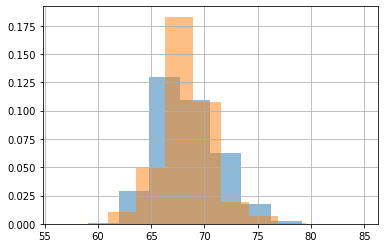

In [ ]:
train.loc[val_train_x.index,'X_01'].hist(density=True,alpha=0.5)#파란색
train.loc[nonval_train_x.index,'X_01'].hist(density=True,alpha=0.5)

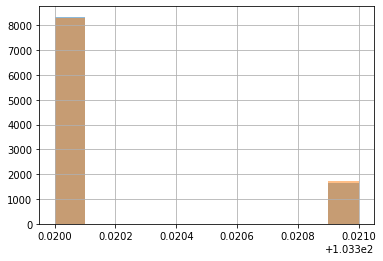

In [ ]:
train.loc[val_train_x.index,'X_02'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_02'].hist(density=True,alpha=0.5)

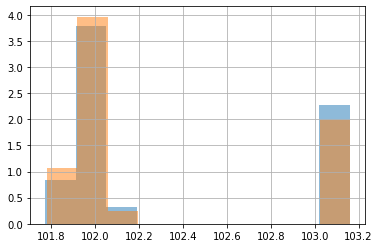

In [ ]:
train.loc[val_train_x.index,'X_05'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_05'].hist(density=True,alpha=0.5)

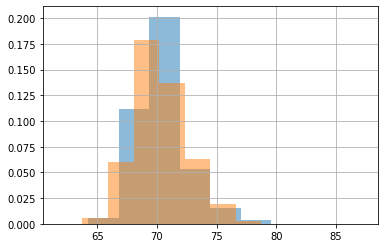

In [ ]:
train.loc[val_train_x.index,'X_06'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_06'].hist(density=True,alpha=0.5)

##방열 재료 무게

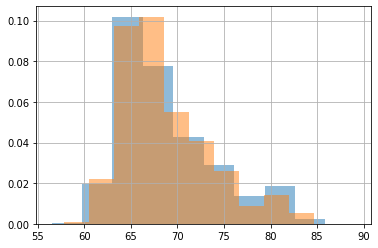

In [ ]:
train.loc[val_train_x.index,'X_03'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_03'].hist(density=True,alpha=0.5)

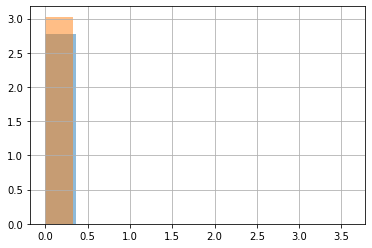

In [ ]:
train.loc[val_train_x.index,'X_10'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_10'].hist(density=True,alpha=0.5)

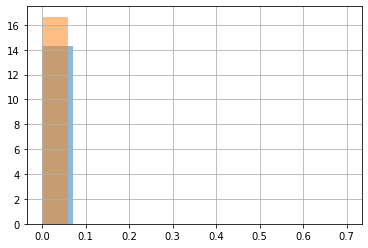

In [ ]:
train.loc[val_train_x.index,'X_11'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_11'].hist(density=True,alpha=0.5)

##검사 통과 여부

##방열 재료 면적

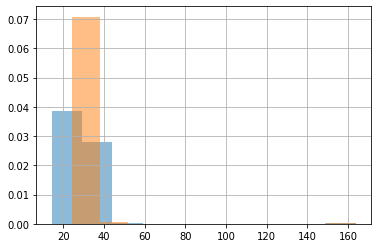

In [ ]:
train.loc[val_train_x.index,'X_07'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_07'].hist(density=True,alpha=0.5)

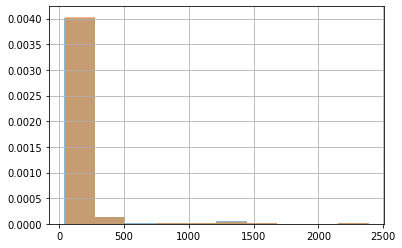

In [ ]:
train.loc[val_train_x.index,'X_08'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_08'].hist(density=True,alpha=0.5)

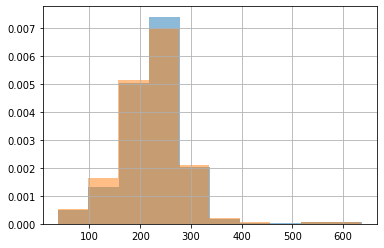

In [ ]:
train.loc[val_train_x.index,'X_09'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_09'].hist(density=True,alpha=0.5)

##커넥터 위치 기준 좌표

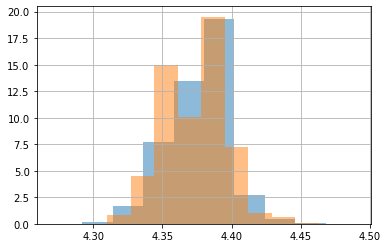

In [ ]:
train.loc[val_train_x.index,'X_12'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_12'].hist(density=True,alpha=0.5)

##각 안테나 패드 위치(높이) 차이

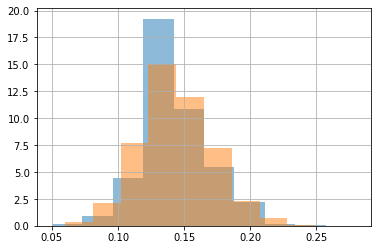

In [ ]:
train.loc[val_train_x.index,'X_13'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_13'].hist(density=True,alpha=0.5)

##n번 안테나 패드 위치(높이)

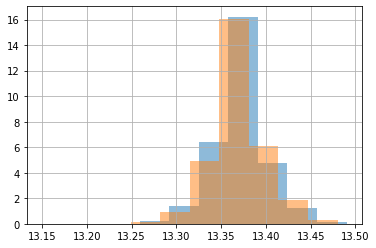

In [ ]:
train.loc[val_train_x.index,'X_14'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_14'].hist(density=True,alpha=0.5)

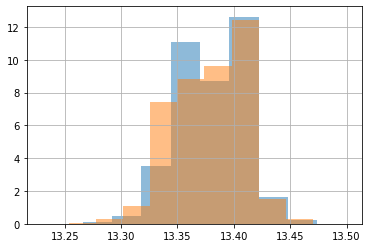

In [ ]:
train.loc[val_train_x.index,'X_15'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_15'].hist(density=True,alpha=0.5)

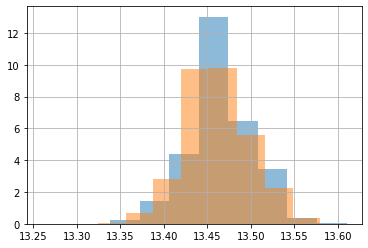

In [ ]:
train.loc[val_train_x.index,'X_16'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_16'].hist(density=True,alpha=0.5)

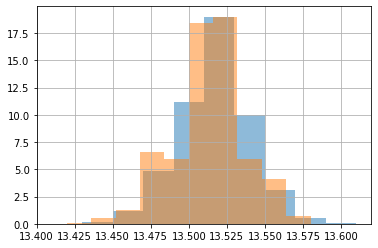

In [ ]:
train.loc[val_train_x.index,'X_17'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_17'].hist(density=True,alpha=0.5)

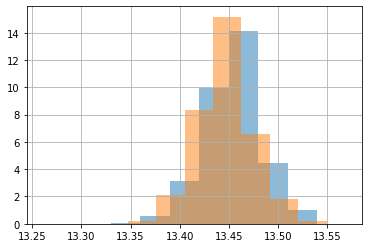

In [ ]:
train.loc[val_train_x.index,'X_18'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_18'].hist(density=True,alpha=0.5)

##n번 스크류 삽입 깊이

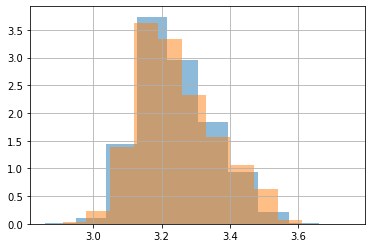

In [ ]:
train.loc[val_train_x.index,'X_19'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_19'].hist(density=True,alpha=0.5)

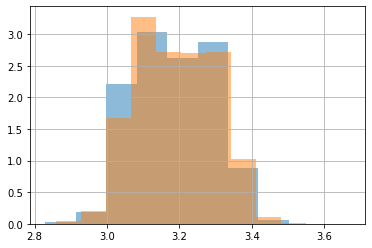

In [ ]:
train.loc[val_train_x.index,'X_20'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_20'].hist(density=True,alpha=0.5)

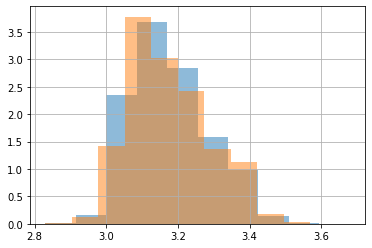

In [ ]:
train.loc[val_train_x.index,'X_21'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_21'].hist(density=True,alpha=0.5)

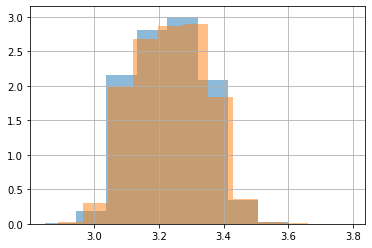

In [ ]:
train.loc[val_train_x.index,'X_22'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_22'].hist(density=True,alpha=0.5)

##커넥터 n번 핀 치수

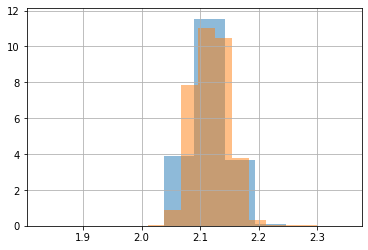

In [ ]:
train.loc[val_train_x.index,'X_24'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_24'].hist(density=True,alpha=0.5)

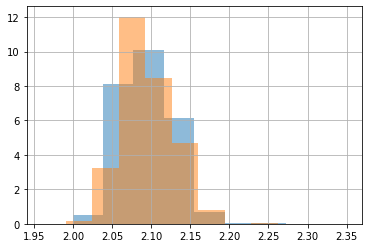

In [ ]:
train.loc[val_train_x.index,'X_25'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_25'].hist(density=True,alpha=0.5)

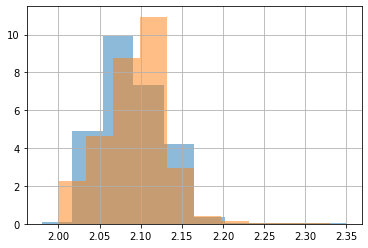

In [ ]:
train.loc[val_train_x.index,'X_26'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_26'].hist(density=True,alpha=0.5)

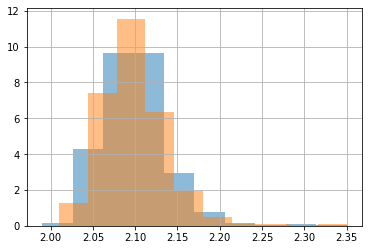

In [ ]:
train.loc[val_train_x.index,'X_27'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_27'].hist(density=True,alpha=0.5)

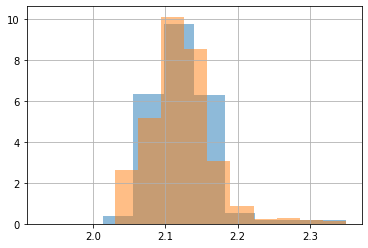

In [ ]:
train.loc[val_train_x.index,'X_28'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_28'].hist(density=True,alpha=0.5)

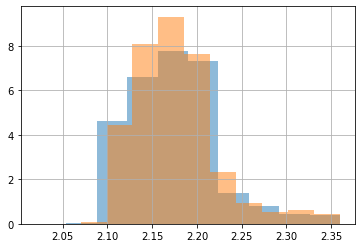

In [ ]:
train.loc[val_train_x.index,'X_29'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_29'].hist(density=True,alpha=0.5)

##스크류 삽입 깊이 n

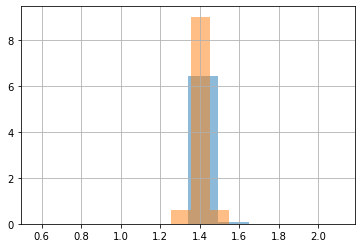

In [ ]:
train.loc[val_train_x.index,'X_30'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_30'].hist(density=True,alpha=0.5)

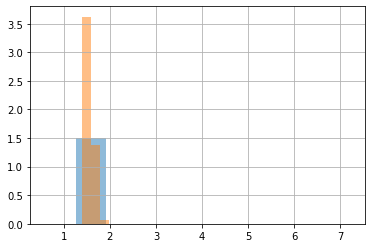

In [ ]:
train.loc[val_train_x.index,'X_31'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_31'].hist(density=True,alpha=0.5)

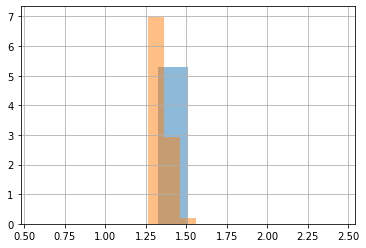

In [ ]:
train.loc[val_train_x.index,'X_32'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_32'].hist(density=True,alpha=0.5)

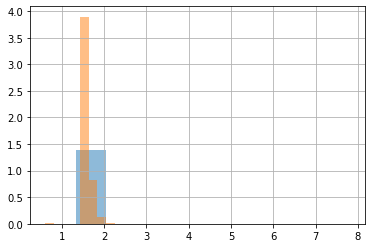

In [ ]:
train.loc[val_train_x.index,'X_33'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_33'].hist(density=True,alpha=0.5)

##스크류 체결 시 분당 회전수 n

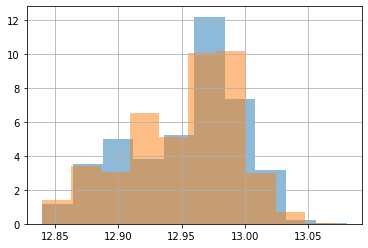

In [ ]:
train.loc[val_train_x.index,'X_34'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_34'].hist(density=True,alpha=0.5)

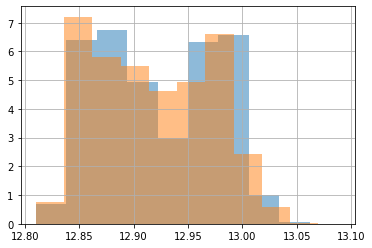

In [ ]:
train.loc[val_train_x.index,'X_35'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_35'].hist(density=True,alpha=0.5)

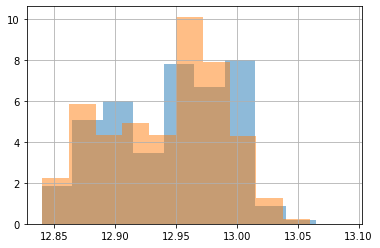

In [ ]:
train.loc[val_train_x.index,'X_36'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_36'].hist(density=True,alpha=0.5)

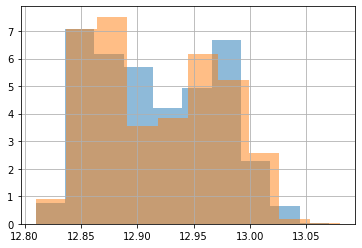

In [ ]:
train.loc[val_train_x.index,'X_37'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_37'].hist(density=True,alpha=0.5)

##하우징 PCB 안착부 n 치수

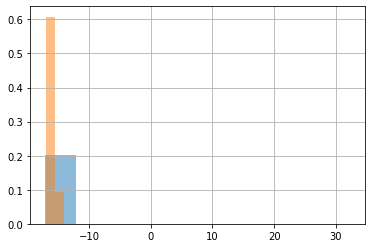

In [ ]:
train.loc[val_train_x.index,'X_38'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_38'].hist(density=True,alpha=0.5)

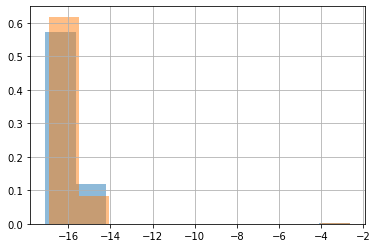

In [ ]:
train.loc[val_train_x.index,'X_39'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_39'].hist(density=True,alpha=0.5)

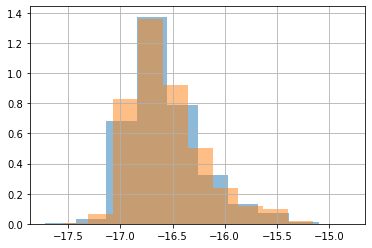

In [ ]:
train.loc[val_train_x.index,'X_40'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_40'].hist(density=True,alpha=0.5)

##레이돔 치수(안테나 n번 부위)

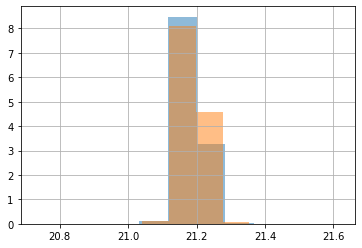

In [ ]:
train.loc[val_train_x.index,'X_41'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_41'].hist(density=True,alpha=0.5)

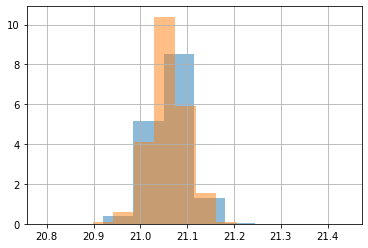

In [ ]:
train.loc[val_train_x.index,'X_42'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_42'].hist(density=True,alpha=0.5)

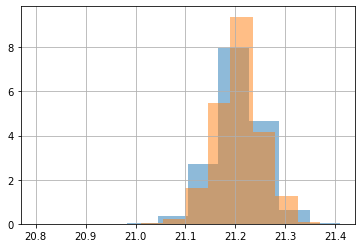

In [ ]:
train.loc[val_train_x.index,'X_43'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_43'].hist(density=True,alpha=0.5)

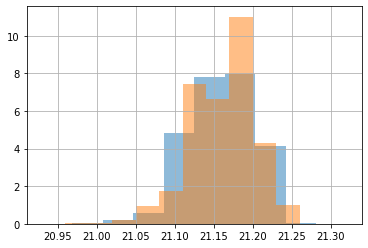

In [ ]:
train.loc[val_train_x.index,'X_44'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_44'].hist(density=True,alpha=0.5)

##안테나 부분 레이돔 기울기 

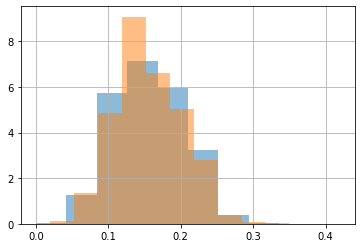

In [ ]:
train.loc[val_train_x.index,'X_45'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_45'].hist(density=True,alpha=0.5)

##실란트 본드 소요량

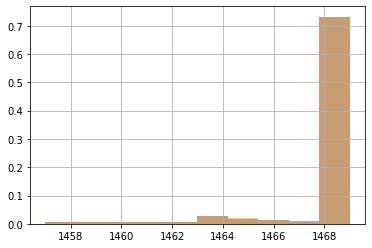

In [ ]:
train.loc[val_train_x.index,'X_46'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_46'].hist(density=True,alpha=0.5)

##Cal 투입 전 대기 시간

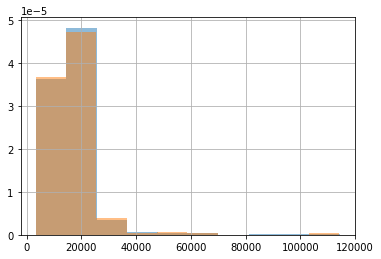

In [ ]:
train.loc[val_train_x.index,'X_49'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_49'].hist(density=True,alpha=0.5)

##RF 부분 SMT 납 량

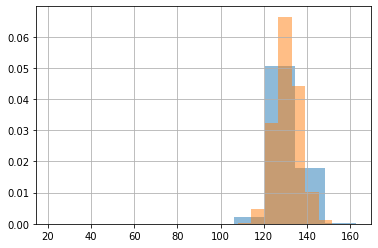

In [ ]:
train.loc[val_train_x.index,'X_50'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_50'].hist(density=True,alpha=0.5)

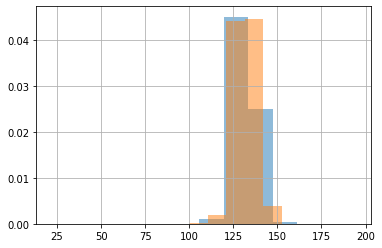

In [ ]:
train.loc[val_train_x.index,'X_51'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_51'].hist(density=True,alpha=0.5)

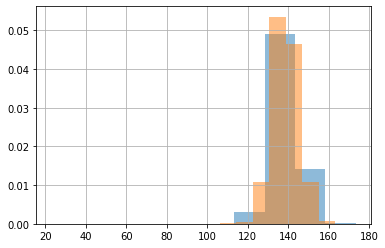

In [ ]:
train.loc[val_train_x.index,'X_52'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_52'].hist(density=True,alpha=0.5)

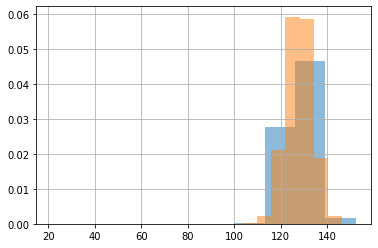

In [ ]:
train.loc[val_train_x.index,'X_53'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_53'].hist(density=True,alpha=0.5)

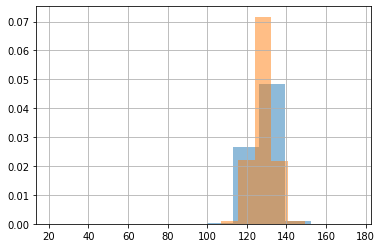

In [ ]:
train.loc[val_train_x.index,'X_54'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_54'].hist(density=True,alpha=0.5)

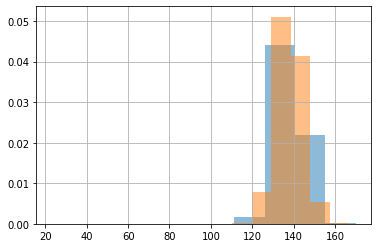

In [ ]:
train.loc[val_train_x.index,'X_55'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_55'].hist(density=True,alpha=0.5)

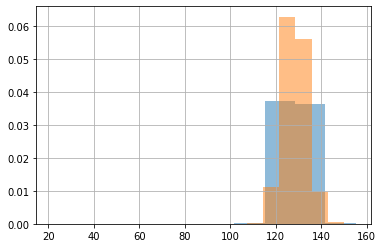

In [ ]:
train.loc[val_train_x.index,'X_56'].hist(density=True,alpha=0.5)
train.loc[nonval_train_x.index,'X_56'].hist(density=True,alpha=0.5)